# 4.10: Coding Etiquette & Excel Reporting

In [6]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [8]:
# Import updated instacart_data DataFrame
instacart_data = pd.read_pickle('/Users/ariedlin/Desktop/Career Foundry Assignments/8-24 Instacart Blanket Analysis Real/2 Data/2 Prepared Data/instacart_data_final')

# 2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [9]:
ords_prods_cust_merge_.head()

,order_id,user_id,order_number,orders_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,First Name,Last Name,Gender,State,Age,date_joined,n_dependants,fam_status,income,merge_status_new
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


The columns in this dataframe that contain PII are 'First Name' and 'Last Name'.  In our project brief, Instacart has not requested any information that would involve analysing those two columns.  At this point, I would check with the project manager my supervisor to make sure it is okay to remove those columns before proceeding. 

In [11]:
#Use the .drop() feature to remove 'First Name' and 'Last Name' columns from dataset.
instacart_data = ords_prods_cust_merge_.drop(['First Name', 'Last Name'], axis=1)

In [12]:
#Chech head() to ensure it worked
instacart_data.head()

,order_id,user_id,order_number,orders_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,customer_frequency,customer_frequency_flag,Gender,State,Age,date_joined,n_dependants,fam_status,income,merge_status_new
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both


In [13]:
# Display column names as a list
print(list(instacart_data.columns))

['order_id', 'user_id', 'order_number', 'orders_dow', 'order_hour_of_day', 'days_since_prior_order', 'product_id', 'add_to_cart_order', 'reordered', 'product_name', 'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest_day', 'busiest_days', 'busiest_hours', 'max_order', 'loyalty_flag', 'spending_avg', 'spender_type', 'customer_frequency', 'customer_frequency_flag', 'Gender', 'State', 'Age', 'date_joined', 'n_dependants', 'fam_status', 'income', 'merge_status_new']


# 3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [16]:
#Create regional mapping based on the 'state' column
region_mapping = {
    # Region 1 (Northeast)
    'Maine': 'Northeast',
    'New Hampshire': 'Northeast',
    'Vermont': 'Northeast',
    'Massachusetts': 'Northeast',
    'Rhode Island': 'Northeast',
    'Connecticut': 'Northeast',
    'New York': 'Northeast',
    'Pennsylvania': 'Northeast',
    'New Jersey': 'Northeast',
    
    # Region 2 (Midwest)
    'Wisconsin': 'Midwest',
    'Michigan': 'Midwest',
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Ohio': 'Midwest',
    'North Dakota': 'Midwest',
    'South Dakota': 'Midwest',
    'Nebraska': 'Midwest',
    'Kansas': 'Midwest',
    'Minnesota': 'Midwest',
    'Iowa': 'Midwest',
    'Missouri': 'Midwest',
    
    # Region 3 (South)
    'Delaware': 'South',
    'Maryland': 'South',
    'District of Columbia': 'South',
    'Virginia': 'South',
    'West Virginia': 'South',
    'North Carolina': 'South',
    'South Carolina': 'South',
    'Georgia': 'South',
    'Florida': 'South',
    'Kentucky': 'South',
    'Tennessee': 'South',
    'Mississippi': 'South',
    'Alabama': 'South',
    'Oklahoma': 'South',
    'Texas': 'South',
    'Arkansas': 'South',
    'Louisiana': 'South',
    
    # Region 4 (West)
    'Idaho': 'West',
    'Montana': 'West',
    'Wyoming': 'West',
    'Nevada': 'West',
    'Utah': 'West',
    'Colorado': 'West',
    'Arizona': 'West',
    'New Mexico': 'West',
    'Alaska': 'West',
    'Washington': 'West',
    'Oregon': 'West',
    'California': 'West',
    'Hawaii': 'West'
}

In [17]:
#Apply mapping to create the 'region' column
instacart_data['region'] = instacart_data['State'].map(region_mapping)

In [18]:
#Check to ensure 'region' column was created correctly
instacart_data.head()

,order_id,user_id,order_number,orders_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,customer_frequency_flag,Gender,State,Age,date_joined,n_dependants,fam_status,income,merge_status_new,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South


In [19]:
spending_by_region = instacart_data.groupby(['region', 'spender_type']).size().unstack()

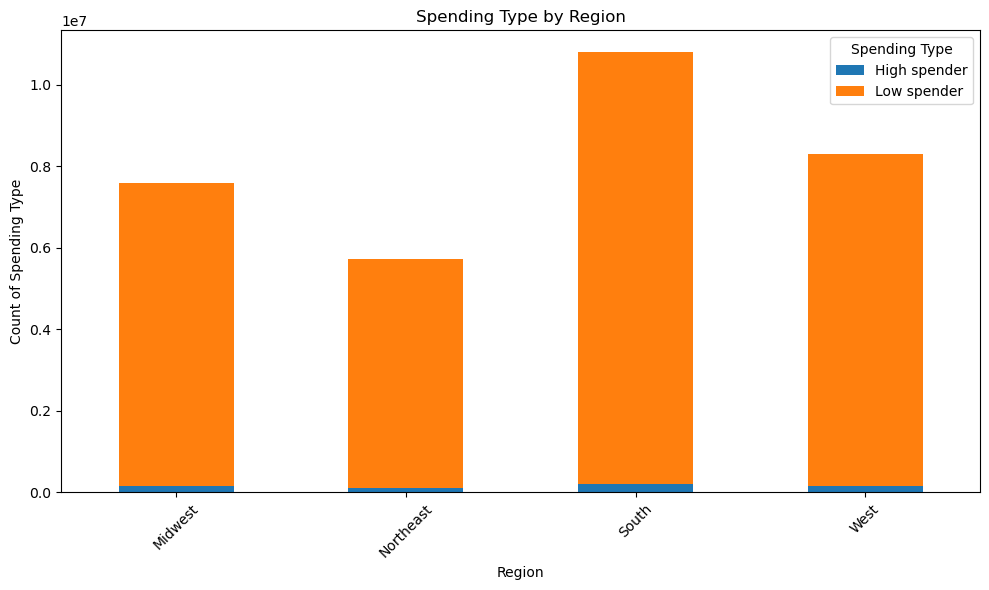

In [20]:
#Create the bar chart
spending_by_region.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Spending Type by Region')
plt.xlabel('Region')
plt.ylabel('Count of Spending Type')
plt.legend(title='Spending Type')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the chart
plt.savefig(os.path.join('/Users/ariedlin/Desktop/Career Foundry Assignments/8-24 Instacart Blanket Analysis Real/4 Analysis/1 Visualizations', 'customer_spending_by_region.png'))

# Display the plot
plt.show()

This stacked bar chart shows that most of Instacart's customers are 'Low Spender' in all four regions. 'High Spender' is a very small proportion of the customers in all regions.  

# 4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [23]:
#Calculate order count per customer
customer_order_counts = instacart_data.groupby('user_id').size()

In [24]:
#Create a flag column in the DataFrame for 'low_activity'
instacart_data['low_activity'] = instacart_data['user_id'].map(customer_order_counts < 5)

In [25]:
#Filter the data to exclude low-activity customers
instacart_data_activ = instacart_data[instacart_data['low_activity'] == False]

In [26]:
#Drop the 'low_activity' flag since it's no longer needed
instacart_data_activ = instacart_data_activ.drop(columns=['low_activity'])

In [27]:
# Check head() to make sure everything looks good
instacart_data_activ.head()

,order_id,user_id,order_number,orders_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,customer_frequency_flag,Gender,State,Age,date_joined,n_dependants,fam_status,income,merge_status_new,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South


In [28]:
#Check shape
instacart_data_activ.shape

(32401975, 32)

In [29]:
#Export instacart_data_activ as a pickle
instacart_data_activ.to_pickle('/Users/ariedlin/Desktop/Career Foundry Assignments/8-24 Instacart Blanket Analysis Real/2 Data/2 Prepared Data/instacart_data_activ')

# 5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [31]:
# Define conditions for each profile
conditions = [
    (instacart_data['Age'] < 30) & (instacart_data['n_dependants'] == 0),
    (instacart_data['Age'] < 30) & (instacart_data['n_dependants'] >= 1),
    (instacart_data['Age'].between(30, 55)) & (instacart_data['n_dependants'] >= 2) & (instacart_data['income'] > 70000),
    (instacart_data['Age'].between(30, 55)) & (instacart_data['n_dependants'] == 0) & (instacart_data['income'] > 70000),
    (instacart_data['Age'] > 55) & (instacart_data['n_dependants'] == 0),
    (instacart_data['Age'] < 55) & (instacart_data['n_dependants'] >= 1) & (instacart_data['income'] < 70000) & (instacart_data['fam_status'] == 'married'),
    (instacart_data['Age'] < 55) & (instacart_data['n_dependants'] >= 1) & (instacart_data['income'] > 100000) & (instacart_data['fam_status'] == 'married')
]

# Define profiles that correspond to each condition
profiles = [
    'Single Adult',
    'Young Parent',
    'Family Shopper',
    'Middle-Aged Professional',
    'Senior Shopper',
    'Low-Income Family',
    'High-Income Family'
]


In [32]:
# Apply conditions to create the 'customer_profile' column
instacart_data['customer_profile'] = np.select(conditions, profiles, default='Other')

In [33]:
# Cheack head() to verify the result
instacart_data.head()

,order_id,user_id,order_number,orders_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,State,Age,date_joined,n_dependants,fam_status,income,merge_status_new,region,low_activity,customer_profile
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Alabama,31,2/17/2019,3,married,40423,both,South,False,Low-Income Family
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Alabama,31,2/17/2019,3,married,40423,both,South,False,Low-Income Family
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Alabama,31,2/17/2019,3,married,40423,both,South,False,Low-Income Family
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Alabama,31,2/17/2019,3,married,40423,both,South,False,Low-Income Family
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Alabama,31,2/17/2019,3,married,40423,both,South,False,Low-Income Family


# 6. Create an appropriate visualization to show the distribution of profiles.

In [35]:
#Count the number of each customer profile
profile_counts = instacart_data['customer_profile'].value_counts()

/var/folders/zg/lgqcn1jn6md3p8399q9rqkwm0000gn/T/ipykernel_44570/330145935.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profile_counts.index, y=profile_counts.values, palette='viridis')


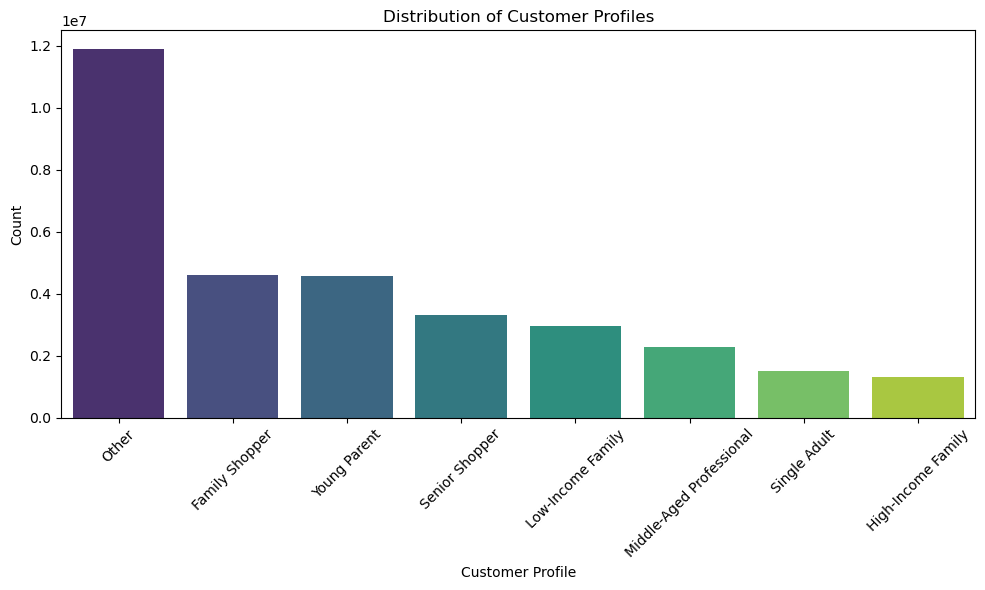

In [36]:
#Plot a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=profile_counts.index, y=profile_counts.values, palette='viridis')
plt.title('Distribution of Customer Profiles')
plt.xlabel('Customer Profile')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

#Save the chart
plt.savefig(os.path.join('/Users/ariedlin/Desktop/Career Foundry Assignments/8-24 Instacart Blanket Analysis Real/4 Analysis/1 Visualizations', 'customer_profiles_distribution.png'))

#Display the plot
plt.show()

This bar chart shows that the majority of Instacart customers fell outside of the parameters I created to be included in any of the customer profiles.  However, of the created profiles, "Family Shopper" and "Young Parent" are the two most common types of instacart shoppers, while "High-Income Family" is the least common.

# 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [39]:
#Calculate total expenditure and usage frequency
usage_frequency = instacart_data.groupby('user_id').size().reset_index(name='order_count')
expenditure = instacart_data.groupby('user_id')['prices'].sum().reset_index()

In [40]:
#Merge the two DataFrames on 'user_id'
customer_data = pd.merge(usage_frequency, expenditure, on='user_id')

In [41]:
#Assign the customer profile
customer_data['customer_profile'] = instacart_data.groupby('user_id')['customer_profile'].first().reset_index(drop=True)

In [42]:
#Aggregate max, mean, and min for usage frequency and expenditure by customer profile
profile_aggregation = customer_data.groupby('customer_profile').agg(
    order_count_max=('order_count', 'max'),
    order_count_mean=('order_count', 'mean'),
    order_count_min=('order_count', 'min'),
    total_expenditure_max=('prices', 'max'),
    total_expenditure_mean=('prices', 'mean'),
    total_expenditure_min=('prices', 'min')
    ).reset_index()

In [43]:
#Check to make sure it worked
print(profile_aggregation)

           customer_profile  order_count_max  order_count_mean  \
0            Family Shopper             2888        170.508377   
1        High-Income Family             1950        171.259376   
2         Low-Income Family             2735        134.821448   
3  Middle-Aged Professional             2546        167.945531   
4                     Other             3704        155.111268   
5            Senior Shopper             3637        157.872915   
6              Single Adult             2429        155.762223   
7              Young Parent             2577        158.091079   

   order_count_min  total_expenditure_max  total_expenditure_mean  \
0                3              1302781.0             2453.218436   
1                3               301846.3             2460.637084   
2                3                23186.7             1000.330183   
3                3              1302311.8             2482.417507   
4                2              1409778.9             1769.2

# 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [45]:
#Count the number of each profile by region
profile_region_counts = instacart_data.groupby(['region', 'customer_profile']).size().unstack()

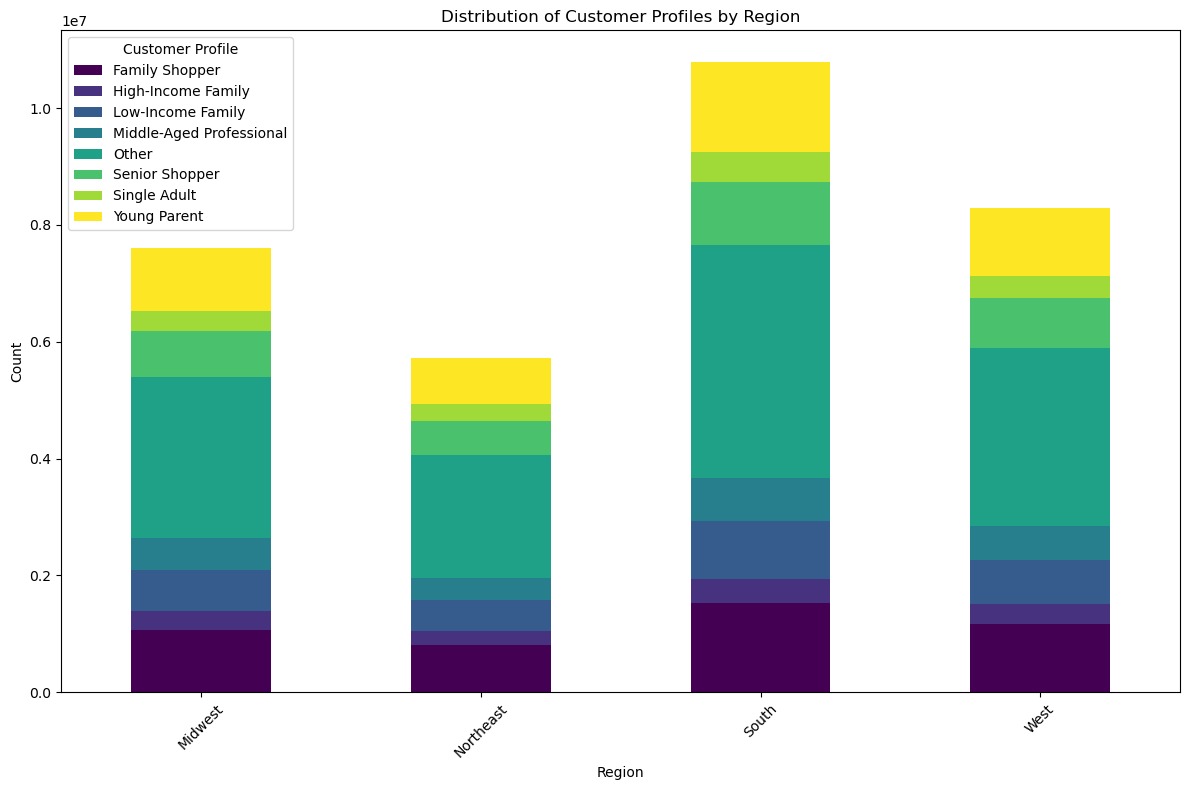

In [46]:
# Plot stacked bar chart
profile_region_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Distribution of Customer Profiles by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Customer Profile')
plt.tight_layout()

# Save the chart
plt.savefig(os.path.join('/Users/ariedlin/Desktop/Career Foundry Assignments/8-24 Instacart Blanket Analysis Real/4 Analysis/1 Visualizations', 'customer_profiles_by_region.png'))

#Show the plot
plt.show()

In [47]:
#Create cross-tab of customer profiles by region
profile_region_ct = pd.crosstab(instacart_data['customer_profile'], instacart_data['region'])
print("Customer Profile vs. Region:")
print(profile_region_ct)

Customer Profile vs. Region:
region                    Midwest  Northeast    South     West
customer_profile                                              
Family Shopper            1070593     816925  1536552  1176246
High-Income Family         320422     239230   403299   338449
Low-Income Family          694342     518808   985556   743098
Middle-Aged Professional   557646     382404   749454   585990
Other                     2761847    2107578  3975204  3056283
Senior Shopper             771770     587354  1089187   846181
Single Adult               345299     276268   515421   376242
Young Parent              1075406     794169  1537212  1170424


Nothing really stands out here.  The 'South' has the largest population of all customer profiles, followed by "West', 'Midwest', and then 'Northeast'.  This makes sense because those are relatively the same proportions of total regional Instacart shoppers.

In [49]:
#Group by department and customer profile and calculate counts
profile_department_counts = instacart_data.groupby(['department_id', 'customer_profile']).size().unstack(fill_value=0)

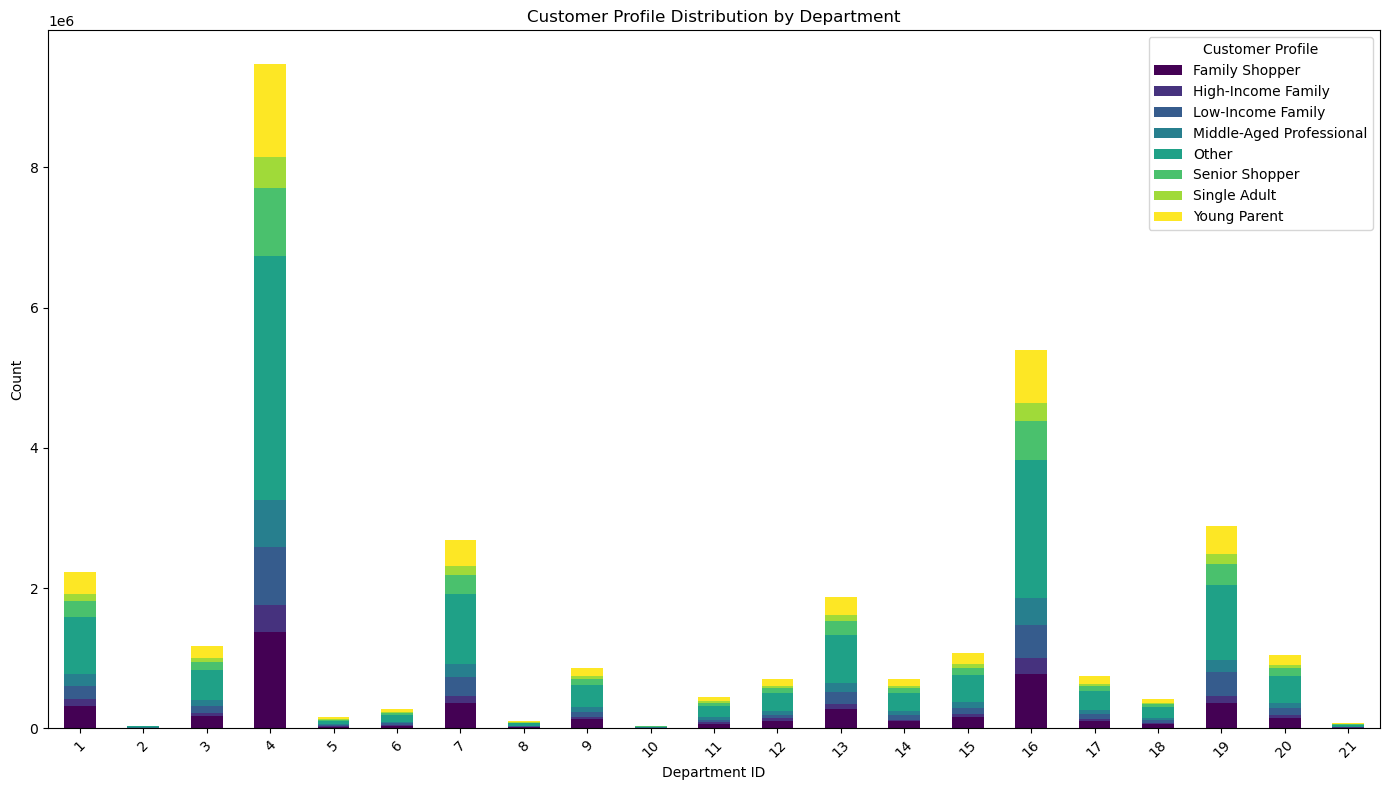

In [50]:
# Plot stacked bar chart
profile_department_counts.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Customer Profile Distribution by Department')
plt.xlabel('Department ID')
plt.ylabel('Count')
plt.legend(title='Customer Profile')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [51]:
#Create cross-tab of customer profiles by department
profile_department_ct = pd.crosstab(instacart_data['customer_profile'], instacart_data['department_id'])
print("\nCustomer Profile vs. Department:")
print(profile_department_ct)


Customer Profile vs. Department:
department_id                 1      2       3        4      5      6   \
customer_profile                                                         
Family Shopper            322299   5161  169122  1372308  21044  39486   
High-Income Family         91517   1377   48100   384735   6408  11303   
Low-Income Family         194757   2982  102823   823266  13835  22616   
Middle-Aged Professional  158438   2605   85689   678495  12558  19839   
Other                     818451  13405  427197  3478275  54937  97581   
Senior Shopper            229768   3598  119140   967314  15143  27101   
Single Adult              101718   1700   54671   443373   6858  12935   
Young Parent              317795   5463  165686  1331525  22913  38392   

department_id                 7      8       9      10  ...      12      13  \
customer_profile                                        ...                   
Family Shopper            359499  14034  129080   4444  ...  109103

Copy of our Data Dictionary from 4.4:
{'1': {'department': 'frozen'}, 
 '2': {'department': 'other'},
 '3': {'department': 'bakery'},
 '4': {'department': 'produce'},
 '5': {'department': 'alcohol'},
 '6': {'department': 'international'},
 '7': {'department': 'beverages'},
 '8': {'department': 'pets'},
 '9': {'department': 'dry goods pasta'},
 '10': {'department': 'bulk'},
 '11': {'department': 'personal care'},
 '12': {'department': 'meat seafood'},
 '13': {'department': 'pantry'},
 '14': {'department': 'breakfast'},
 '15': {'department': 'canned goods'},
 '16': {'department': 'dairy eggs'},
 '17': {'department': 'household'},
 '18': {'department': 'babies'},
 '19': {'department': 'snacks'},
 '20': {'department': 'deli'},
 '21': {'department': 'missing'}}

From a glance, it appears that the 'Family Shopper' and 'Young Parent' profiles buy larger amounts of baby products, breakfast items, snacks, canned goods, and produce.  'Senior Shoppers' look like they buy a bigger proportion of deli goods, household items, alcohol and meat/seafood.  Other than that, nothing really stants out.

# 9. Produce suitable charts to illustrate your results and export them in your project folder.

Text(0, 0.5, 'Order Count')

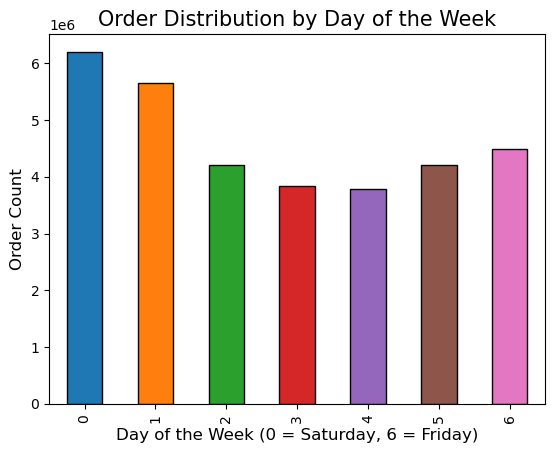

In [55]:
# Recreate bar chart showing busiest days of week with labels and improved colors
# Define a distinct color palette for each day of the week
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Recreate bar chart showing busiest days of week with labels and more distinct colors
bar = instacart_data['orders_dow'].value_counts().sort_index().plot.bar(color=colors, edgecolor='black')

# Adding title and axis labels
plt.title('Order Distribution by Day of the Week', fontsize=15)
plt.xlabel('Day of the Week (0 = Saturday, 6 = Friday)', fontsize=12)
plt.ylabel('Order Count', fontsize=12)

In [56]:
# Export the orders_dow updated bar chart with new colors
bar.figure.savefig(os.path.join('/Users/ariedlin/Desktop/Career Foundry Assignments/8-24 Instacart Blanket Analysis Real/4 Analysis/1 Visualizations', 'bar_orders_dow_final.png'))

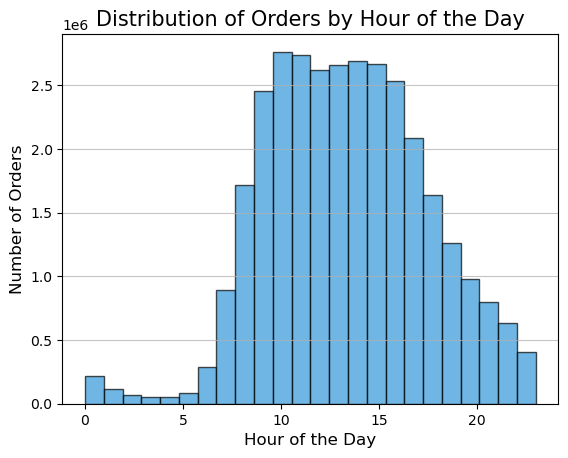

In [57]:
#Recreate histogram for orders by hour of day placed with axis labels and header
# Create a histogram for 'order_hour_of_day' with 24 bins
hist = instacart_data['order_hour_of_day'].plot.hist(bins=24, color='#3498db', edgecolor='black', alpha=0.7)

# Adding title and axis labels
plt.title('Distribution of Orders by Hour of the Day', fontsize=15)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)

# Display the plot
plt.grid(axis='y', alpha=0.75)  # Add grid lines for better readability
plt.show()

In [58]:
# Export the new order_hour_of_day histogram 
hist.figure.savefig(os.path.join('/Users/ariedlin/Desktop/Career Foundry Assignments/8-24 Instacart Blanket Analysis Real/4 Analysis/1 Visualizations', 'hist_order_hour_of_day_final.png'))

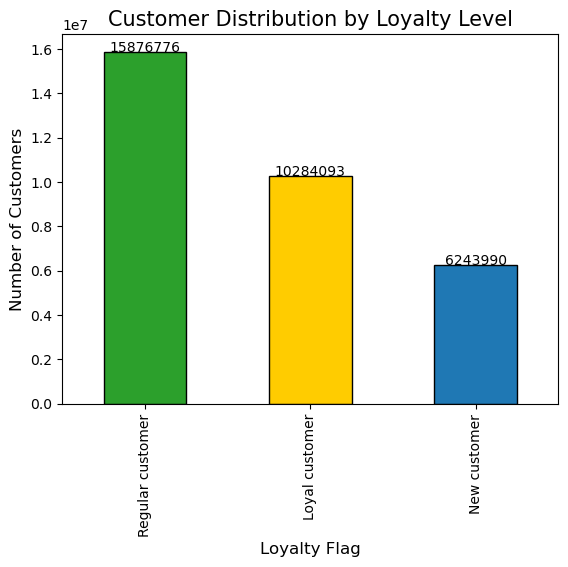

In [59]:
# Recreate the 'loyalty_flag' bar chart with title and axis labels
loyalty_bar = ords_prods_cust_merge_['loyalty_flag'].value_counts().plot.bar(color=['#2ca02c', '#ffcc00', '#1f78b4'], edgecolor='black')

# Adding title and axis labels
plt.title('Customer Distribution by Loyalty Level', fontsize=15)
plt.xlabel('Loyalty Flag', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Adding value labels on top of each bar
for index, value in enumerate(ords_prods_cust_merge_['loyalty_flag'].value_counts()):
    plt.text(index, value + 500, str(value), ha='center', fontsize=10)

# Display the plot
plt.show()

In [60]:
# Export the loyalty_flag updated bar chart
loyalty_bar.figure.savefig(os.path.join('/Users/ariedlin/Desktop/Career Foundry Assignments/8-24 Instacart Blanket Analysis Real/4 Analysis/1 Visualizations', 'bar_loyalty_flag_final.png'))

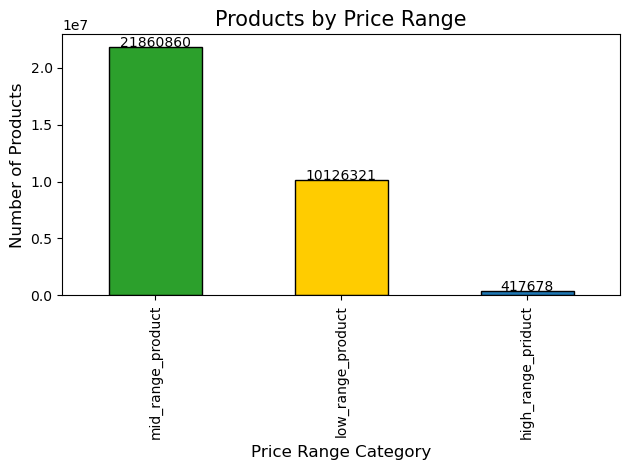

In [61]:
# Create a 'price_range_loc' bar chart with title and axis labels
price_range_bar = instacart_data['price_range_loc'].value_counts().plot.bar(color=['#2ca02c', '#ffcc00', '#1f78b4'], edgecolor='black')
plt.title('Products by Price Range', fontsize=15)
plt.xlabel('Price Range Category', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.tight_layout()

# Adding value labels on top of each bar
for index, value in enumerate(instacart_data['price_range_loc'].value_counts()):
    plt.text(index, value + 500, str(value), ha='center', fontsize=10)

# Display the plot
plt.show()

In [62]:
# Export the loyalty_flag updated bar chart
price_range_bar.figure.savefig(os.path.join('/Users/ariedlin/Desktop/Career Foundry Assignments/8-24 Instacart Blanket Analysis Real/4 Analysis/1 Visualizations', 'bar_price_range_final.png'))

In [63]:
# Group by 'department_id' and calculate counts
department_counts = instacart_data.groupby('department_id').size()

In [64]:
#Department dictionary
department_dict = {
    '1': 'frozen', '2': 'other', '3': 'bakery', '4': 'produce', '5': 'alcohol',
    '6': 'international', '7': 'beverages', '8': 'pets', '9': 'dry goods pasta',
    '10': 'bulk', '11': 'personal care', '12': 'meat seafood', '13': 'pantry',
    '14': 'breakfast', '15': 'canned goods', '16': 'dairy eggs', '17': 'household',
    '18': 'babies', '19': 'snacks', '20': 'deli', '21': 'missing'
}

/var/folders/zg/lgqcn1jn6md3p8399q9rqkwm0000gn/T/ipykernel_44570/3097570539.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Department')


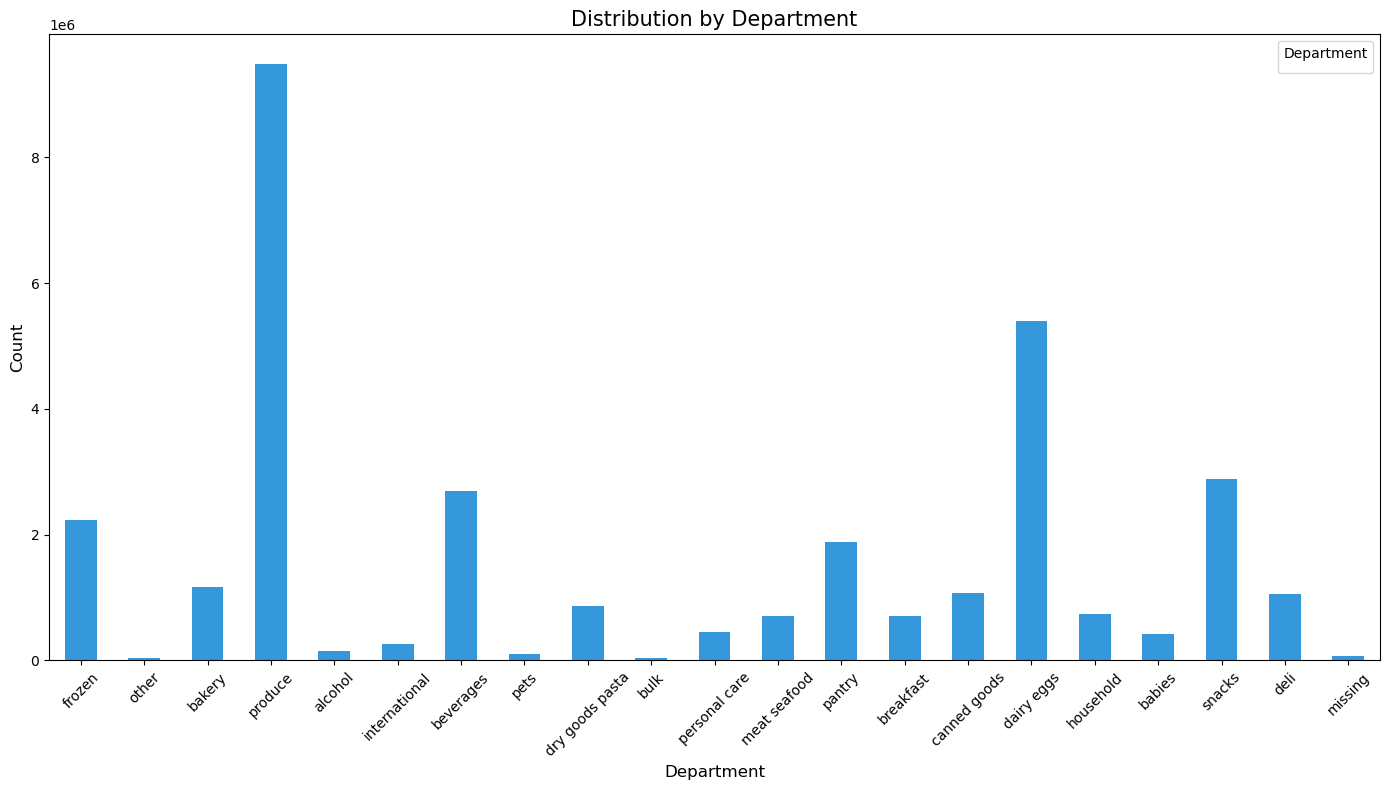

In [65]:
# Create bar chart showing order counts by department
department_counts.plot(kind='bar', stacked=True, figsize=(14, 8), color='#3498db')
plt.title('Distribution by Department', fontsize=15)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Replace x-axis labels with department names
plt.xticks(ticks=range(len(department_counts.index)), labels=[department_dict[str(i)] for i in department_counts.index], rotation=45)
plt.legend(title='Department')
plt.tight_layout()  # Adjust layout to fit all labels

# Save the plot
plt.savefig(os.path.join('/Users/ariedlin/Desktop/Career Foundry Assignments/8-24 Instacart Blanket Analysis Real/4 Analysis/1 Visualizations', 'department_bar_final.png'))

# Display the plot
plt.show()

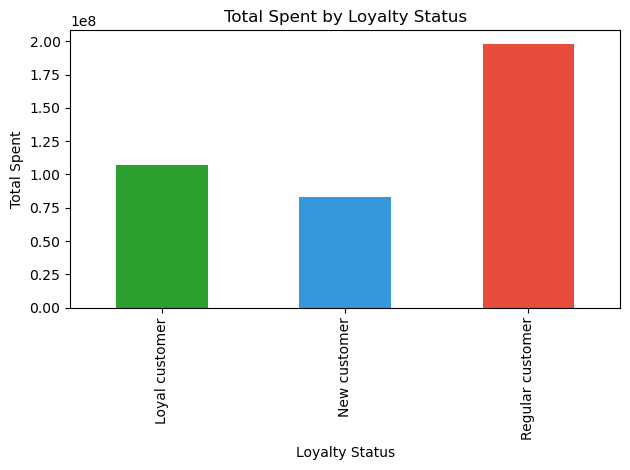

In [66]:
# Create bar chart showing spending by loyalty status
bar_spending_by_loyalty = instacart_data.groupby('loyalty_flag')['prices'].sum()
bar_spending_by_loyalty.plot(kind='bar', color=['#2ca02c', '#3498db', '#e74c3c'])
plt.title("Total Spent by Loyalty Status")
plt.xlabel("Loyalty Status")
plt.ylabel("Total Spent")

# Adjust layout to fit labels and save the plot
plt.tight_layout()  # Adjusts the layout to fit all labels
plt.savefig(os.path.join('/Users/ariedlin/Desktop/Career Foundry Assignments/8-24 Instacart Blanket Analysis Real/4 Analysis/1 Visualizations', 'spending_by_loyalty.png'))

# Display the plot
plt.show()

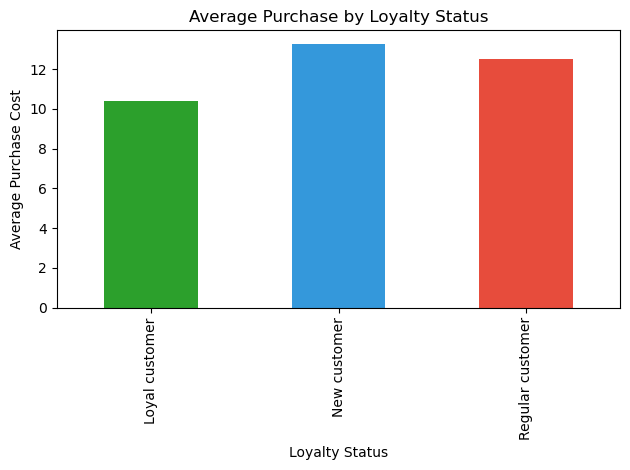

In [67]:
# Create bar chart showing spending by loyalty status
bar_spending_by_loyalty = instacart_data.groupby('loyalty_flag')['prices'].mean()
bar_spending_by_loyalty.plot(kind='bar', color=['#2ca02c', '#3498db', '#e74c3c'])
plt.title("Average Purchase by Loyalty Status")
plt.xlabel("Loyalty Status")
plt.ylabel("Average Purchase Cost")

# Adjust layout to fit labels and save the plot
plt.tight_layout()  # Adjusts the layout to fit all labels
plt.savefig(os.path.join('/Users/ariedlin/Desktop/Career Foundry Assignments/8-24 Instacart Blanket Analysis Real/4 Analysis/1 Visualizations', 'price_avg_by_loyalty_final.png'))

# Display the plot
plt.show()

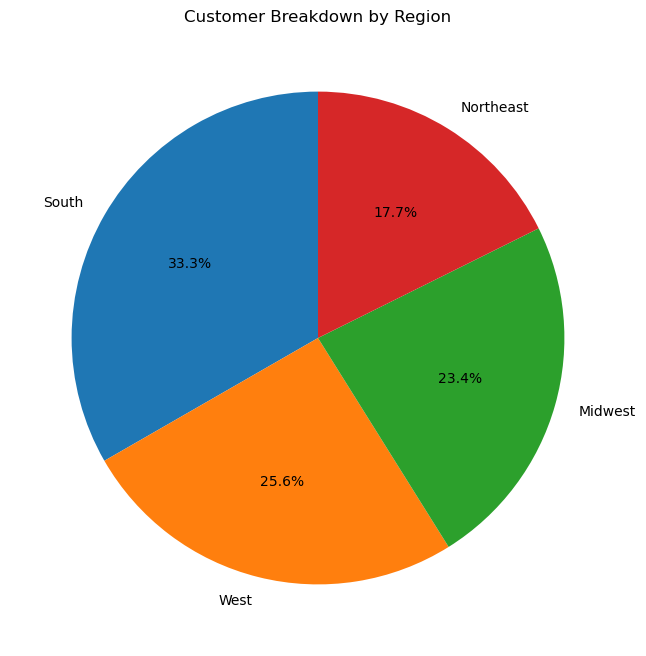

In [68]:
#Create Pie Chart showing breakdown of Instacartt customers by region
#Count customers by region
region_counts = instacart_data['region'].value_counts()

#Create a pie chart
region_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 8))

#Add a title
plt.title("Customer Breakdown by Region")

#Save the chart
plt.savefig(os.path.join('/Users/ariedlin/Desktop/Career Foundry Assignments/8-24 Instacart Blanket Analysis Real/4 Analysis/1 Visualizations', 'customer_breakdown_by_region.png'))

#Display the plot
plt.ylabel("")
plt.show()

In [69]:
instacart_data.head()

,order_id,user_id,order_number,orders_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,State,Age,date_joined,n_dependants,fam_status,income,merge_status_new,region,low_activity,customer_profile
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Alabama,31,2/17/2019,3,married,40423,both,South,False,Low-Income Family
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Alabama,31,2/17/2019,3,married,40423,both,South,False,Low-Income Family
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Alabama,31,2/17/2019,3,married,40423,both,South,False,Low-Income Family
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Alabama,31,2/17/2019,3,married,40423,both,South,False,Low-Income Family
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Alabama,31,2/17/2019,3,married,40423,both,South,False,Low-Income Family


In [70]:
# Display column names as a list
print(list(instacart_data.columns))

['order_id', 'user_id', 'order_number', 'orders_dow', 'order_hour_of_day', 'days_since_prior_order', 'product_id', 'add_to_cart_order', 'reordered', 'product_name', 'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest_day', 'busiest_days', 'busiest_hours', 'max_order', 'loyalty_flag', 'spending_avg', 'spender_type', 'customer_frequency', 'customer_frequency_flag', 'Gender', 'State', 'Age', 'date_joined', 'n_dependants', 'fam_status', 'income', 'merge_status_new', 'region', 'low_activity', 'customer_profile']


I ran out of room in this notebook and it kept restarting my kernel.  I continued making charts in 4.10 Part 2.

# 10. Tidy up your script, export your final data set, and save your notebook.

In [ ]:
#Export final dataset
instacart_data.to_pickle('/Users/ariedlin/Desktop/Career Foundry Assignments/8-24 Instacart Blanket Analysis Real/2 Data/2 Prepared Data/instacart_data_final')